## This purpose of this code snippet is to load the price data for the various products and scale the prices to within a reference range.

In [1]:
import numpy as np
import pandas as pd

In [60]:
retailData = pd.read_csv('./data/WA_Retail-SalesMarketing_-ProfitCost.csv')

In [61]:
retailData.head(2)

,Year,Product_line,Product_type,Product,Order_method_type,Retailer_country,Revenue,Planned_revenue,Product_cost,Quantity,Unit_cost,Unit_price,Gross_profit,Unit_sale_price
0,2004,Camping Equipment,Cooking Gear,TrailChef Water Bag,Telephone,United States,437477.15,344917.4931,169471.4212,66385,2.552857,6.59,268005.7288,5.195714
1,2004,Camping Equipment,Cooking Gear,TrailChef Water Bag,Telephone,Canada,14313.48,13444.6800,6298.8000,2172,2.900000,6.59,8014.6800,6.190000


#### select relevant products only product line -> product type -> product = 'Personal Accessories' -> 'Watches' -> 'Mountain Man *'

In [63]:
retailData1 = retailData[(retailData['Product_line']=='Personal Accessories') & (retailData['Product_type']=='Watches') \
           & (retailData['Product'].str.contains('Mountain Man'))]

In [64]:
retailData1.head(2)

,Year,Product_line,Product_type,Product,Order_method_type,Retailer_country,Revenue,Planned_revenue,Product_cost,Quantity,Unit_cost,Unit_price,Gross_profit,Unit_sale_price
2556,2004,Personal Accessories,Watches,Mountain Man Analog,Telephone,United States,157002.56,150781.98670,96360,3212,30,48.88,60642.56,46.943333
2557,2004,Personal Accessories,Watches,Mountain Man Analog,Telephone,Mexico,17254.64,16620.41667,10590,353,30,48.88,6664.64,47.083333


In [65]:
retailDataGrp = retailData1.groupby('Product')

In [66]:
len(retailDataGrp)

5

In [67]:
retailDataGrp.first()

,Year,Product_line,Product_type,Order_method_type,Retailer_country,Revenue,Planned_revenue,Product_cost,Quantity,Unit_cost,Unit_price,Gross_profit,Unit_sale_price
Product,,,,,,,,,,,,,
Mountain Man Analog,2004,Personal Accessories,Watches,Telephone,United States,157002.56,150781.9867,96360.00,3212,30.00,48.88,60642.56,46.943333
Mountain Man Combination,2004,Personal Accessories,Watches,Telephone,United States,84974.67,79876.7100,39015.00,867,45.00,98.01,45959.67,92.130000
Mountain Man Deluxe,2004,Personal Accessories,Watches,Telephone,United States,162366.05,150997.4400,77649.00,1991,39.00,81.55,84717.05,75.840000
Mountain Man Digital,2004,Personal Accessories,Watches,Telephone,United States,122832.72,118351.3569,59040.00,2952,20.00,41.61,63792.72,40.091923
Mountain Man Extreme,2004,Personal Accessories,Watches,Telephone,United States,57698.48,53658.9200,22773.24,196,116.19,294.38,34925.24,273.770000


In [140]:
for nme, grp in retailDataGrp:
    print(nme)
    #print(grp)

Mountain Man Analog
Mountain Man Combination
Mountain Man Deluxe
Mountain Man Digital
Mountain Man Extreme


In [48]:
retailDataGrp.size()

Product
Mountain Man Analog         205
Mountain Man Combination    200
Mountain Man Deluxe         209
Mountain Man Digital        204
Mountain Man Extreme        206
dtype: int64

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

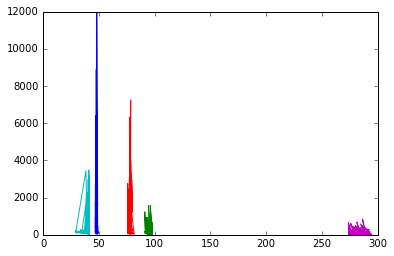

In [101]:
for name, grp in retailDataGrp:
    x = grp['Unit_sale_price']
    y = grp['Quantity']
    plt.plot(x,y)


#### set the length of the price scale - in this case, 50

In [102]:
scale = 50

#### create a dataframe to store the scale data - one column per product

In [112]:
scale_matrix = pd.DataFrame(columns=(retailDataGrp.groups.keys()))

In [111]:
retailDataGrp.groups.keys()

dict_keys(['Mountain Man Digital', 'Mountain Man Deluxe', 'Mountain Man Combination', 'Mountain Man Extreme', 'Mountain Man Analog'])

In [113]:
scale_matrix

,Mountain Man Digital,Mountain Man Deluxe,Mountain Man Combination,Mountain Man Extreme,Mountain Man Analog


In [178]:
for nme, grp in retailDataGrp:
    prc = grp['Unit_sale_price'] #a series of prices per product
    prc = prc.unique() #numpy ndarray
    prc.sort()
    #process each price array and create a scale for the price series
    #print(nme)
    #determine the min and max range for the scale
    #note: can increase this range using some percentage of min/ max price...
    fl = int(np.floor(prc.min()))
    cl = int(np.ceil(prc.max()))
    #scale_matrix.add(prc, axis=1)
    l = list(np.arange(fl,cl, (cl-fl)/scale))
    s = pd.Series(data=l)
    #add to the scale_matrix in the appropriate column
    scale_matrix[nme] = s
    ###done!!! - we have the price scale ready 

In [179]:
scale_matrix

,Mountain Man Digital,Mountain Man Deluxe,Mountain Man Combination,Mountain Man Extreme,Mountain Man Analog
0,29.00,75.00,91.00,273.00,46.00
1,29.26,75.14,91.16,273.44,46.06
2,29.52,75.28,91.32,273.88,46.12
3,29.78,75.42,91.48,274.32,46.18
4,30.04,75.56,91.64,274.76,46.24
5,30.30,75.70,91.80,275.20,46.30
6,30.56,75.84,91.96,275.64,46.36
7,30.82,75.98,92.12,276.08,46.42
8,31.08,76.12,92.28,276.52,46.48
9,31.34,76.26,92.44,276.96,46.54


In [186]:
##the scale - prices will be determined on this scale and translated using the scale_matrix for each product..
s = pd.Series(np.arange(0,1,1/scale))

In [188]:
scale_matrix['scale']=s

In [189]:
scale_matrix

,Mountain Man Digital,Mountain Man Deluxe,Mountain Man Combination,Mountain Man Extreme,Mountain Man Analog,scale
0,29.00,75.00,91.00,273.00,46.00,0.00
1,29.26,75.14,91.16,273.44,46.06,0.02
2,29.52,75.28,91.32,273.88,46.12,0.04
3,29.78,75.42,91.48,274.32,46.18,0.06
4,30.04,75.56,91.64,274.76,46.24,0.08
5,30.30,75.70,91.80,275.20,46.30,0.10
6,30.56,75.84,91.96,275.64,46.36,0.12
7,30.82,75.98,92.12,276.08,46.42,0.14
8,31.08,76.12,92.28,276.52,46.48,0.16
9,31.34,76.26,92.44,276.96,46.54,0.18
